In [3]:
from sklearn import datasets
X,y = datasets.load_breast_cancer(return_X_y=True)


/Applications/anaconda3/envs/ML_Flow/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/envs/ML_Flow/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/envs/ML_Flow/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/envs/ML_Flow/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/envs/ML_Flow/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

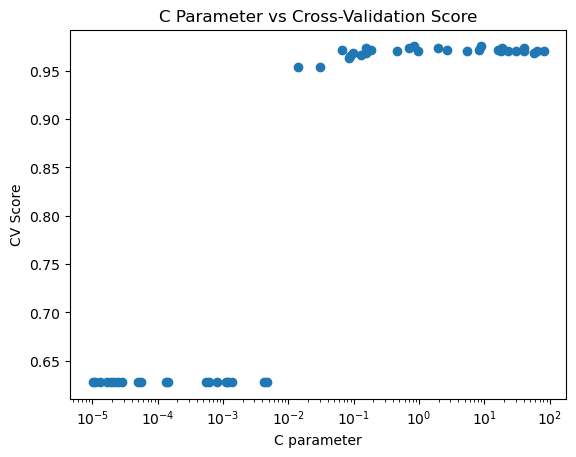

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import loguniform, uniform

import matplotlib.pyplot as plt
import pandas as pd

pipeline = Pipeline([
 ('scaler', StandardScaler()),
 ('classifier', LogisticRegression(solver='saga', penalty='elasticnet'))
 ])
param_distributions = {
'classifier__C': loguniform(1e-5, 100),
'classifier__l1_ratio': uniform(0, 1),
'classifier__max_iter': np.arange(100, 1000, 100)
 }

rs = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=3, random_state=42)
rs.fit(X, y)


# Plot C parameter vs score
results = pd.DataFrame(rs.cv_results_)
plt.scatter(results['param_classifier__C'], results['mean_test_score'])
plt.xscale('log')
plt.xlabel('C parameter')
plt.ylabel('CV Score')
plt.title('C Parameter vs Cross-Validation Score')

# Log plot
plt.show()


# graph to log as artifcat

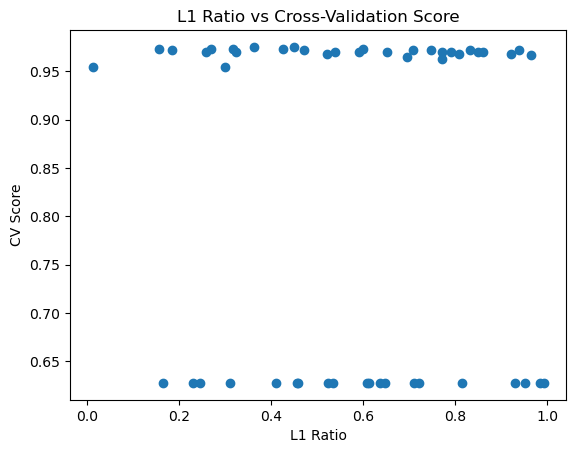

In [7]:
plt.scatter(results['param_classifier__l1_ratio'], results['mean_test_score'])
plt.xlabel('L1 Ratio')
plt.ylabel('CV Score')
plt.title('L1 Ratio vs Cross-Validation Score')

# Log plot
plt.show()